# Capstone Project: Student- Ratsey Ching Wai Man, Student No. - 4787732W

In [ ]:
# To analyze the behaviors of candidates landing on various online platforms, 
# an institution that markets courses on multiple websites examines the factors influencing potential candidate conversion success.
# Studying external factors affecting the successful selection, ‘Converted’, we may establish the following four hypotheses and uncover the hidden potential from the researches:

#1.Hypothesis A: There is a regression relationship between Converted rate and the various Marketing dimensions

#2.Hypothesis B: The Converted rate can be predicted from clients’ feedback and their background

#3.Hypothesis C: There are opportunities to extend the markets to other major cities and overseas

#4.Hypotheses D: The reviews can help predicting from the review-related surveys and reviews in free text may predict the subject’s decisions


# 1 Dataset: Lead scores
 https://www.Kaggle.com/code/ggsri123/lead-score

In [1]:
# Import modules
import pandas as pd
import numpy as np
import pylab as pl
from scipy import stats
from six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression

# Import Necessary Libraries for Regression Analysis
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# For ploting graphs
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [2]:
# Download my dataset
file_name = "RatseyDataset.csv"
lead = pd.read_csv(file_name)

In [3]:
# Preview our data
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2 Restructuring the dataset

In [4]:
# retrieve the Marketing-related columns from the lead Datasets
Marketing = lead[['Converted','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 
                 'Get updates on DM Content','Do Not Call','I agree to pay the amount through cheque',
                 'A free copy of Mastering The Interview','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
Marketing.head()

,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Do Not Call,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0
1,0,No,No,No,No,No,No,No,No,No,No,No,No,No,5.0,674,2.5
2,1,No,No,No,No,No,No,No,No,No,No,No,No,Yes,2.0,1532,2.0
3,0,No,No,No,No,No,No,No,No,No,No,No,No,No,1.0,305,1.0
4,1,No,No,No,No,No,No,No,No,No,No,No,No,No,2.0,1428,1.0


In [5]:
# Convert yes/no to 1/0
# List of columns with Yes/No values
yes_no_columns = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content', 'Get updates on DM Content', 'Do Not Call',
    'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'
]

# Replace 'Yes' with 1 and 'No' with 0 in the specified columns
Marketing[yes_no_columns] = Marketing[yes_no_columns].replace({'Yes': 1, 'No': 0})

#print(Marketing[yes_no_columns].head())
Marketing.head()


C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\2437119506.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Marketing[yes_no_columns] = Marketing[yes_no_columns].replace({'Yes': 1, 'No': 0})
C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\2437119506.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Marketing[yes_no_columns] = Marketing[yes_no_columns].replace({'Yes': 1, 'No': 0})


,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Do Not Call,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,1532,2.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,305,1.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1428,1.0


In [6]:
# Checking the null entries; the response rates are good here!
Marketing.isnull().sum()

Converted                                     0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content                     0
Do Not Call                                   0
I agree to pay the amount through cheque      0
A free copy of Mastering The Interview        0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
dtype: int64

In [7]:
Marketing.shape

(9240, 17)

In [8]:
# removing rows with NaN
marketing=Marketing.dropna()
marketing.isnull().sum()

Converted                                   0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
Do Not Call                                 0
I agree to pay the amount through cheque    0
A free copy of Mastering The Interview      0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
dtype: int64

In [9]:
marketing.describe()

,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Do Not Call,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.0,9103.0,9103.000000,9103.0,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,0.001538,0.0,0.000220,0.000110,0.000110,0.000439,0.000769,0.0,0.0,0.0,0.000220,0.0,0.317258,3.445238,481.350104,2.362820
std,0.485464,0.039189,0.0,0.014822,0.010481,0.010481,0.020959,0.027721,0.0,0.0,0.0,0.014822,0.0,0.465434,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,9.000000,1.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,3.000000,244.000000,2.000000
75%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,5.000000,919.500000,3.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,251.000000,2272.000000,55.000000


In [ ]:
# Hypothesis A, Model 1, Converted Vs Marketing-Boolean columns

In [10]:
# Logistic Regression Model build up
independent = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
             'Digital Advertisement', 'Through Recommendations', 'Do Not Call','A free copy of Mastering The Interview']

X = marketing[independent]
y = marketing['Converted']

In [11]:
# Split the data for training and testing, 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# check data types of all columns to see whether they are the same
print(X_train.dtypes)
print(X_test.dtypes)

Search                                    int64
Newspaper Article                         int64
X Education Forums                        int64
Newspaper                                 int64
Digital Advertisement                     int64
Through Recommendations                   int64
Do Not Call                               int64
A free copy of Mastering The Interview    int64
dtype: object
Search                                    int64
Newspaper Article                         int64
X Education Forums                        int64
Newspaper                                 int64
Digital Advertisement                     int64
Through Recommendations                   int64
Do Not Call                               int64
A free copy of Mastering The Interview    int64
dtype: object


In [13]:
# LogRegression Model with Hyperparameter tuning to obtain the Best Parameter option
# Fill NaN values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:
{'model__C': 0.01, 'model__solver': 'lbfgs'}
Best Score:
0.6180161910918214
Confusion Matrix:
[[1703    1]
 [1024    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1704
           1       0.75      0.00      0.01      1027

    accuracy                           0.62      2731
   macro avg       0.69      0.50      0.39      2731
weighted avg       0.67      0.62      0.48      2731

ROC-AUC Score:
0.5161867831461342


In [16]:
# To improve the low recall for class 1
# Add a class_weight='balanced' option to the LogisticRegression model to automatically adjust the weights inversely proportional to class frequencies.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

# Include additional hyperparameters like penalty, fit_intercept, and class_weight to explore more combinations that might improve model performance.
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__class_weight': [None, 'balanced'],
    'model__fit_intercept': [True, False]
}

# Perform cross-validated grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=3000))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced'],
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1', verbose=1)

In [14]:
# Threshold Adjustment
# Instead of using the default decision threshold of 0.5, experiment with different thresholds to find one that balances precision and recall for Class 1.

from sklearn.metrics import precision_recall_curve

y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Choose a threshold that balances precision and recall
# Instead of using the default or optimal threshold, pick a more conservative threshold
# This will reduce recall for Class 1 but might improve precision.
optimal_threshold = thresholds[np.argmax(recalls * (recalls < 1))]  # Avoid recall = 1

y_pred_threshold = (y_probs >= optimal_threshold).astype(int)

# Evaluate the adjusted model
print("Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_probs))

Adjusted Threshold Confusion Matrix:
[[ 555 1149]
 [ 302  725]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.43      1704
           1       0.39      0.71      0.50      1027

    accuracy                           0.47      2731
   macro avg       0.52      0.52      0.47      2731
weighted avg       0.55      0.47      0.46      2731

ROC-AUC Score:
0.5161867831461342


In [15]:
# Plat the ROC Curves and AUC Scores:
# Compute the ROC curve, and AUC score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

# Get predicted probabilities for the positive class
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Compute ROC curve and AUC for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

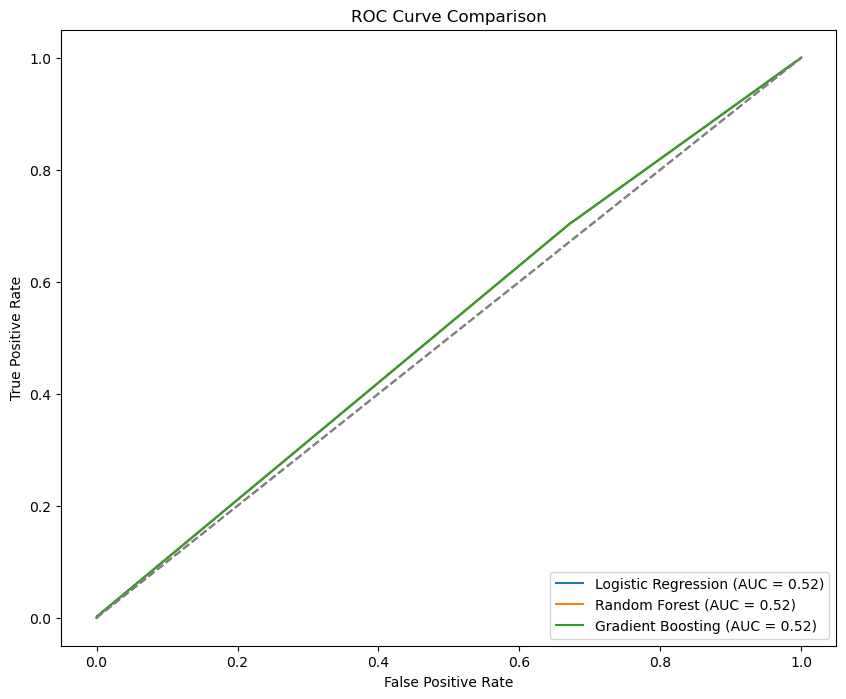

In [19]:
# Plot the ROC Curves
plt.figure(figsize=(10, 8))

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Plot ROC curve for Logistic Regression
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')

# Plot ROC curve for Random Forest
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Plot ROC curve for Gradient Boosting
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Graph details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [121]:
# Try another model 1 (Not in use)
# Create an ensemble model (e.g., using VotingClassifier) that combines Logistic Regression with other models to improve robustness and performance.

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=3000, class_weight='balanced')),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'))
])

# Feature Engineering
# adding new features or performing feature selection to improve the model's predictive power

from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('model', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

# Cross-Validation with Stratification

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Final Evaluation
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_probs >= optimal_threshold).astype(int)

print("Final Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Final Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("Final ROC-AUC Score:")
print(roc_auc_score(y_test, y_probs))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 18 28 32 34 36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 18 28 32 34 36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx

Final Adjusted Threshold Confusion Matrix:
[[ 777  918]
 [  16 1061]]
Final Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.46      0.62      1695
           1       0.54      0.99      0.69      1077

    accuracy                           0.66      2772
   macro avg       0.76      0.72      0.66      2772
weighted avg       0.81      0.66      0.65      2772

Final ROC-AUC Score:
0.9536864939482832


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Try another model 2: Support Vector Machine (SVM) (Not in use)
from sklearn.svm import SVC

# Define the pipeline with SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True))  # SVM with probability estimates
])

# Hyperparameter tuning for SVM
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

In [135]:
# Try anothor model 3:(Not in use)
# Using an ensemble method that combines the strengths of different models, such as SVM, Logistic Regression, and Random Forests

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the ensemble model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=3000, class_weight='balanced')),
        ('rf', RandomForestClassifier(class_weight='balanced')),
        ('svc', SVC(probability=True, class_weight='balanced'))
    ], voting='soft'))
])

# Hyperparameter tuning for the ensemble model
param_grid = {
    'model__lr__C': [0.01, 0.1, 1, 10],
    'model__svc__C': [0.01, 0.1, 1, 10],
    'model__svc__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:
{'model__lr__C': 0.1, 'model__svc__C': 0.01, 'model__svc__kernel': 'rbf'}
Best Score:
0.6178593283467233
Confusion Matrix:
[[1702    2]
 [1024    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1704
           1       0.60      0.00      0.01      1027

    accuracy                           0.62      2731
   macro avg       0.61      0.50      0.39      2731
weighted avg       0.62      0.62      0.48      2731

ROC-AUC Score:
0.5159810698008237


In [134]:
# Try another model/ hyperparmeter Tuning (Not in use)
# Additional Metrics for Hyperparameter Tuning: focus on metrics like f1, roc_auc, or recall other than accuracy

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution, 
# particularly when using SVM or other classifiers that are sensitive to class imbalance before training

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define the pipeline with SMOTE and SVM
pipeline = ImbPipeline([
    ('smote', SMOTE()),  # Oversample minority class
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True))  # SVM with probability estimates
])

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [16]:
# To generate the formula
# Logistic Regression with scikit-learn

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = model.coef_[0]  # For binary classification, coef_ is 2D; we need the 1st row
intercept = model.intercept_[0]

# Extract feature names
feature_names = X.columns

# Build the formula string
formula_parts = [f"{coef:.3f} * {name}" for coef, name in zip(coefficients, feature_names)]
formula = " + ".join(formula_parts)
formula = f"logit(p) = {intercept:.3f} + {formula}"

# Print the logistic regression formula
print("Logistic Regression Formula:")
print(formula)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Logistic Regression Formula:
logit(p) = -0.435 + 0.038 * Search + 0.180 * Newspaper Article + -0.379 * X Education Forums + 0.000 * Newspaper + -0.329 * Digital Advertisement + 0.581 * Through Recommendations + 0.817 * Do Not Call + -0.147 * A free copy of Mastering The Interview


In [ ]:
# Hypothesis A, Model 2

In [17]:
# Define varables and target variable: Case A - Converted Vs Numerical columns
#independent = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
#             'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
#             'Update me on Supply Chain Content', 'Get updates on DM Content', 'Do Not Call',
#             'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
#             'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
independent = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X1 = marketing[independent]
y1 = marketing['Converted']


In [18]:
# Split the data for training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [19]:
# check data types of all columns to see whether they are the same
print(X1_train.dtypes)
print(X1_test.dtypes)

TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
dtype: object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
dtype: object


In [20]:
# Fill NaN values with the mean of each column
X1_train.fillna(X1_train.mean(), inplace=True)
X1_test.fillna(X1_test.mean(), inplace=True)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X1_train, y1_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y1_pred = grid_search.best_estimator_.predict(X1_test)
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("Classification Report:")
print(classification_report(y1_test, y1_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y1_test, grid_search.best_estimator_.predict_proba(X1_test)[:, 1]))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:
{'model__C': 0.01, 'model__solver': 'liblinear'}
Best Score:
0.7104547665219935
Confusion Matrix:
[[1514  190]
 [ 565  462]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1704
           1       0.71      0.45      0.55      1027

    accuracy                           0.72      2731
   macro avg       0.72      0.67      0.68      2731
weighted avg       0.72      0.72      0.71      2731

ROC-AUC Score:
0.7221784128986838


In [25]:
# To improve the low recall of 45% for class 1
# Add a class_weight='balanced' option to the LogisticRegression model to automatically adjust the weights inversely proportional to class frequencies.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

# Include additional hyperparameters like penalty, fit_intercept, and class_weight to explore more combinations that might improve model performance.
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__class_weight': [None, 'balanced'],
    'model__fit_intercept': [True, False]
}

# Threshold Adjustment
# Instead of using the default decision threshold of 0.5, experiment with different thresholds to find one that balances precision and recall for Class 1.

from sklearn.metrics import precision_recall_curve

y1_probs = grid_search.best_estimator_.predict_proba(X1_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y1_test, y1_probs)

# Choose a threshold that balances precision and recall
optimal_idx = np.argmax(precisions * recalls)
optimal_threshold = thresholds[optimal_idx]

y1_pred_threshold = (y1_probs >= optimal_threshold).astype(int)

# Evaluate the adjusted model
print("Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y1_test, y1_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y1_test, y1_probs))

Adjusted Threshold Confusion Matrix:
[[ 593 1111]
 [  86  941]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      1704
           1       0.46      0.92      0.61      1027

    accuracy                           0.56      2731
   macro avg       0.67      0.63      0.55      2731
weighted avg       0.72      0.56      0.54      2731

ROC-AUC Score:
0.7221784128986838


In [21]:
#Try another model 1
# Create an ensemble model (e.g., using VotingClassifier) that combines Logistic Regression with other models to improve robustness and performance.

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=3000, class_weight='balanced')),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'))
])

print("Adjusted Threshold Confusion Matrix for ensemble model:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_probs))

Adjusted Threshold Confusion Matrix for ensemble model:
[[ 555 1149]
 [ 302  725]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.43      1704
           1       0.39      0.71      0.50      1027

    accuracy                           0.47      2731
   macro avg       0.52      0.52      0.47      2731
weighted avg       0.55      0.47      0.46      2731

ROC-AUC Score:
0.5161867831461342


In [22]:
# Try another model 2: Feature Engineering
# adding new features or performing feature selection to improve the model's predictive power

from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('model', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

print("Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_probs))

Adjusted Threshold Confusion Matrix:
[[ 555 1149]
 [ 302  725]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.43      1704
           1       0.39      0.71      0.50      1027

    accuracy                           0.47      2731
   macro avg       0.52      0.52      0.47      2731
weighted avg       0.55      0.47      0.46      2731

ROC-AUC Score:
0.5161867831461342


In [23]:
# Try another model 3: Cross-Validation with Stratification in case the above model are too aggresive

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)

# Additional Metrics and Custom Scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1)

print("Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_probs))

Adjusted Threshold Confusion Matrix:
[[ 555 1149]
 [ 302  725]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.43      1704
           1       0.39      0.71      0.50      1027

    accuracy                           0.47      2731
   macro avg       0.52      0.52      0.47      2731
weighted avg       0.55      0.47      0.46      2731

ROC-AUC Score:
0.5161867831461342


In [24]:
# Plot the ROC Curves and AUC Scores:
# Compute the ROC curve, and AUC score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

# Get predicted probabilities for the positive class
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Compute ROC curve and AUC for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

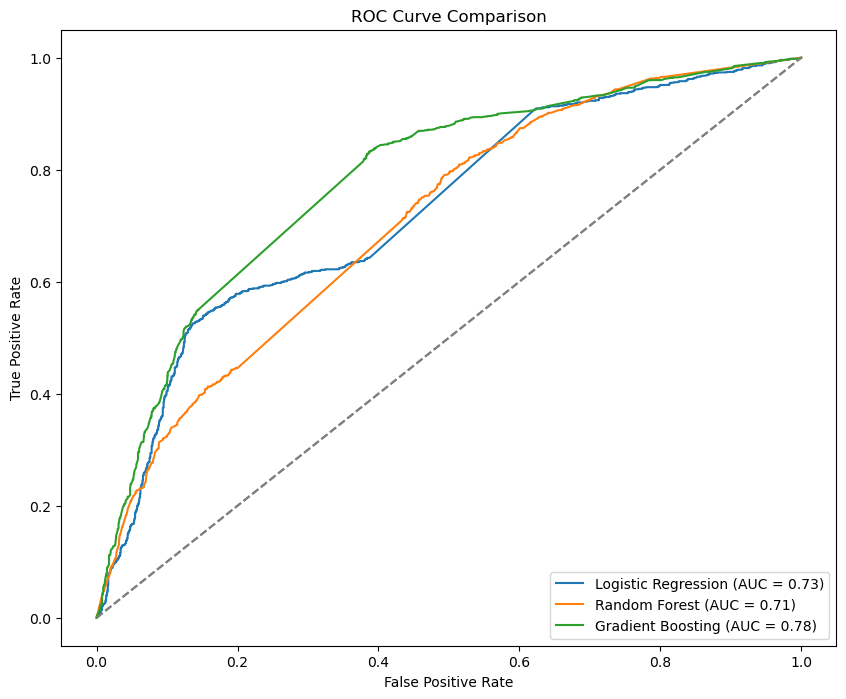

In [36]:
# Plot the ROC Curves
plt.figure(figsize=(10, 8))

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Plot ROC curve for Logistic Regression
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')

# Plot ROC curve for Random Forest
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Plot ROC curve for Gradient Boosting
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Graph details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Try another model 4: Support Ventor Machine (SVM) (Not in use)

In [ ]:
from sklearn.svm import SVC

# Define the pipeline with SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True))  # SVM with probability estimates
])

# Hyperparameter tuning for SVM
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Try another model 5:
# Using an ensemble method that combines the strengths of different models, such as SVM, Logistic Regression, and Random Forests

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the ensemble model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=3000, class_weight='balanced')),
        ('rf', RandomForestClassifier(class_weight='balanced')),
        ('svc', SVC(probability=True, class_weight='balanced'))
    ], voting='soft'))
])

# Hyperparameter tuning for the ensemble model
param_grid = {
    'model__lr__C': [0.01, 0.1, 1, 10],
    'model__svc__C': [0.01, 0.1, 1, 10],
    'model__svc__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

In [ ]:
# Additional Metrics for Hyperparameter Tuning: focus on metrics like f1, roc_auc, or recall other than accuracy

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1)

In [ ]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution, 
# particularly when using SVM or other classifiers that are sensitive to class imbalance before training

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define the pipeline with SMOTE and SVM
pipeline = ImbPipeline([
    ('smote', SMOTE()),  # Oversample minority class
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVC(probability=True))  # SVM with probability estimates
])

# Rest of the code remains the same...

In [ ]:
# Try another model 6: XG Boost

In [ ]:
# Add XGBoost to the pipeline and tune its hyperparameters using GridSearchCV 
# or RandomizedSearchCV to find the best configuration.

pip install xgboost

from xgboost import XGBClassifier

# Define the pipeline with XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling (optional with tree-based models)
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Hyperparameter tuning for XGBoost
param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.3],
    'model__scale_pos_weight': [1, 5, 10]  # Adjust this for class imbalance
}

grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1]))

In [ ]:
# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Use it in your model:
model__scale_pos_weight': [1, scale_pos_weight]  # Add this to your param_grid

# Feature Importance and Selection
import matplotlib.pyplot as plt
from xgboost import plot_importance

best_model = grid_search.best_estimator_.named_steps['model']
plot_importance(best_model)
plt.show()

In [ ]:
# Ensemble Learning with XGBoost to combine XGBoost with other models, using a stacking approach to further boost performance.

from sklearn.ensemble import StackingClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=3000, class_weight='balanced')),
            ('svc', SVC(probability=True, class_weight='balanced')),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
        ],
        final_estimator=LogisticRegression(),  # You can choose a meta-model
        stack_method='predict_proba',
        passthrough=True  # Use original features along with the predictions
    ))
])

In [25]:
# To generate the formula
# Logistic Regression with scikit-learn

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y1_train)

# Extract coefficients and intercept
coefficients = model.coef_[0]  # For binary classification, coef_ is 2D; we need the 1st row
intercept = model.intercept_[0]

# Extract feature names
feature_names = X1.columns

# Build the formula string
formula_parts = [f"{coef:.3f} * {name}" for coef, name in zip(coefficients, feature_names)]
formula = " + ".join(formula_parts)
formula = f"logit(p) = {intercept:.3f} + {formula}"

# Print the logistic regression formula
print("Logistic Regression Formula:")
print(formula)

# Predict on the test set
y1_pred = model.predict(X_test)


Logistic Regression Formula:
logit(p) = -0.435 + 0.038 * TotalVisits + 0.180 * Total Time Spent on Website + -0.379 * Page Views Per Visit


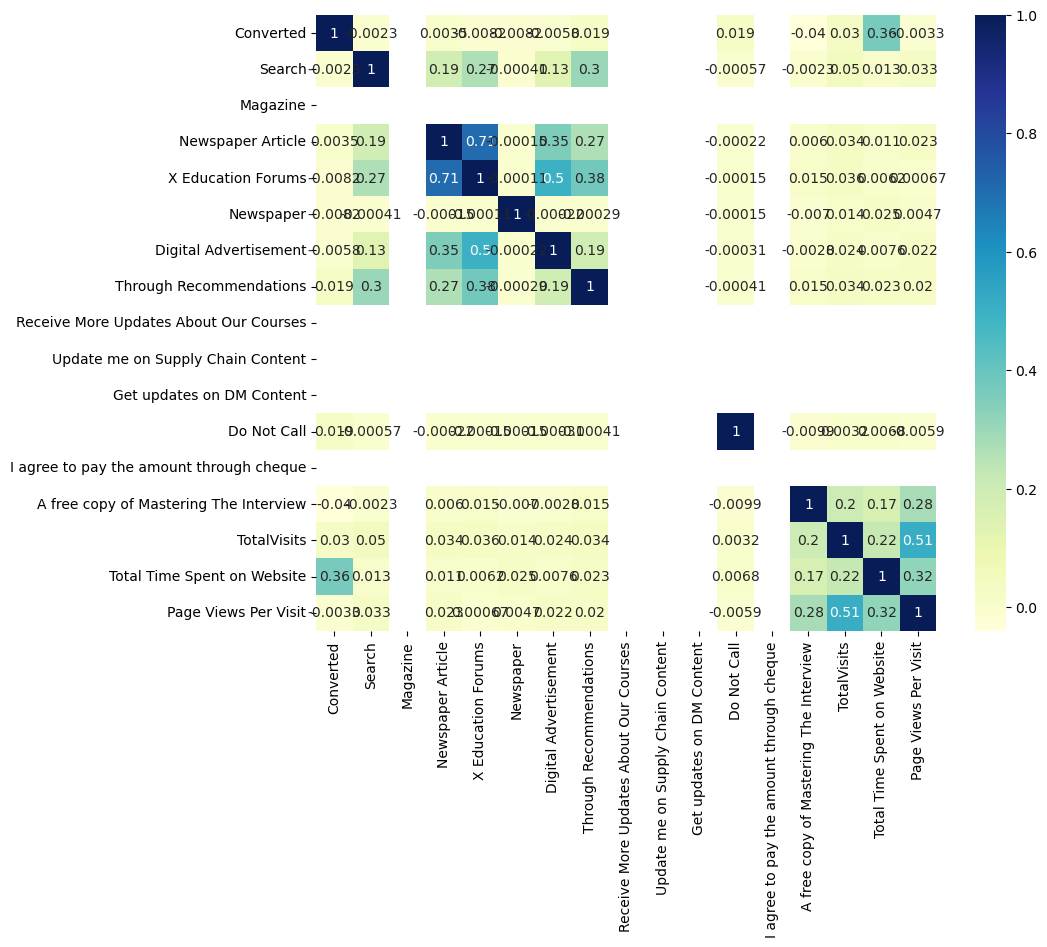

In [26]:
# Heatmap: Data Exploring to understand the Marketing DataFrame
# 1. Highly corelated features: Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, 
# Get updates on DM Content are to be dropped from Aanalysis
# Numerical columns are standalone and could be seperated to have another grouping to research
plt.figure(figsize=(10,8))
sns.heatmap(Marketing.corr(),cmap="YlGnBu",annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

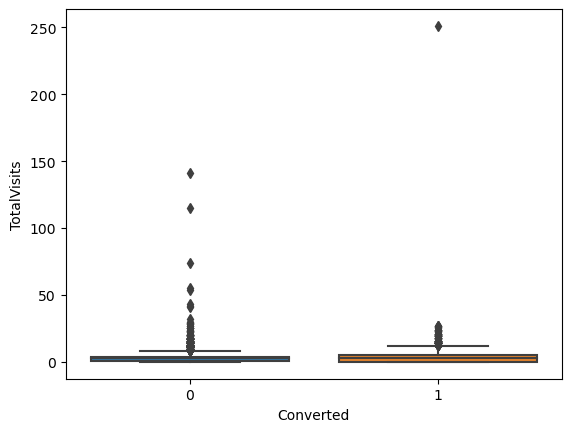

In [27]:
#boxplot of TotalVisits, showing outliner: not serious
sns.boxplot(y='TotalVisits',x='Converted',data=Marketing)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

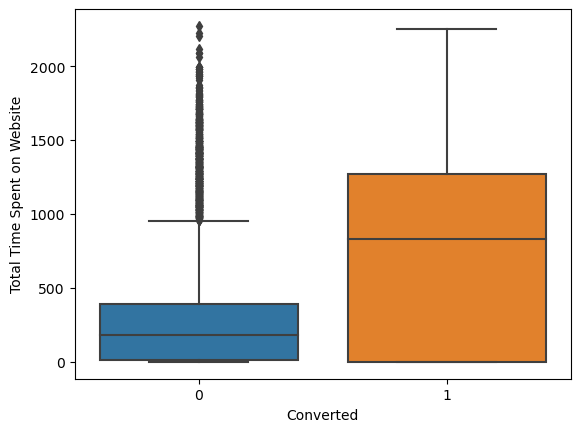

In [28]:
#boxplot of Total Time Spent on Website Vs. Converted Variable, showing outliner: not serious
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=Marketing)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

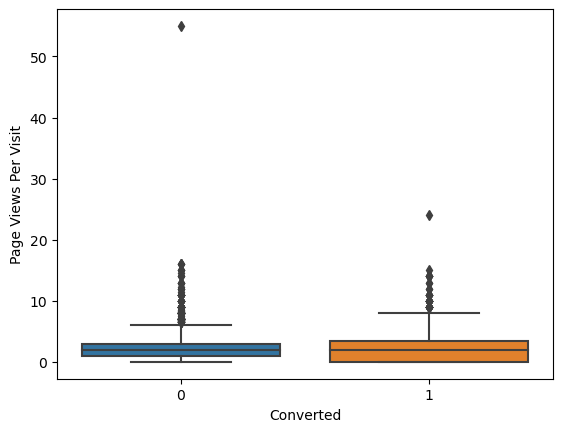

In [29]:
#boxplot of Page Views Per Visit Vs. Converted Variable, showing outliner: not serious
sns.boxplot(y='Page Views Per Visit',x='Converted',data=Marketing)
plt.show

In [ ]:
# Hypothese B: Study on the Client-related columns

In [30]:
# retrieve the Client-related columns from the lead Datasets
Client = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]
Client.head()

,Converted,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Specialization
0,0,Select,Unemployed,Better Career Prospects,Interested in other courses,Select
1,0,Select,Unemployed,Better Career Prospects,Ringing,Select
2,1,Select,Student,Better Career Prospects,Will revert after reading the email,Business Administration
3,0,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Media and Advertising
4,1,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select


In [31]:
# Converting 'Select'values to NaN
Client=Client.replace('Select',np.nan)
Client.head()

,Converted,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Specialization
0,0,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN
1,0,NaN,Unemployed,Better Career Prospects,Ringing,NaN
2,1,NaN,Student,Better Career Prospects,Will revert after reading the email,Business Administration
3,0,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Media and Advertising
4,1,Other,Unemployed,Better Career Prospects,Will revert after reading the email,NaN


In [32]:
# Checking the null entries
Client.isnull().sum()

Converted                                           0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Specialization                                   3380
dtype: int64

In [33]:
Client.shape

(9240, 6)

In [34]:
# Checking null value of each columns
round(100*Client.isnull().sum()/len(Client.index))

Converted                                         0.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Tags                                             36.0
Specialization                                   37.0
dtype: float64

In [35]:
# Exploring the distribution of What matters most to you in choosing a course
Client =Client.groupby('What matters most to you in choosing a course')['Converted'].agg(['count']).reset_index()
Client.head()

,What matters most to you in choosing a course,count
0,Better Career Prospects,6528
1,Flexibility & Convenience,2
2,Other,1


In [36]:
# Exploring the distribution of Specialization 
Client = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]
Client =Client.groupby('Specialization')['Converted'].agg(['count']).reset_index()
Client.head()

,Specialization,count
0,"Banking, Investment And Insurance",338
1,Business Administration,403
2,E-Business,57
3,E-COMMERCE,112
4,Finance Management,976


In [37]:
# Exploring the distribution of What is your current occupation 
Client = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]
Client =Client.groupby('What is your current occupation')['Converted'].agg(['count']).reset_index()
Client.head()

,What is your current occupation,count
0,Businessman,8
1,Housewife,10
2,Other,16
3,Student,210
4,Unemployed,5600


In [38]:
# Exploring the distribution of How did you hear about X Education
Client = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]
Client =Client.groupby('How did you hear about X Education')['Converted'].agg(['count']).reset_index()
Client.head()

,How did you hear about X Education,count
0,Advertisements,70
1,Email,26
2,Multiple Sources,152
3,Online Search,808
4,Other,186


In [39]:
# Exploring the distribution of Tags
Client = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]
Client =Client.groupby('Tags')['Converted'].agg(['count']).reset_index()
Client.head()

,Tags,count
0,Already a student,465
1,Busy,186
2,Closed by Horizzon,358
3,Diploma holder (Not Eligible),63
4,Graduation in progress,111


In [ ]:
Hypothesis B, Model 1, Dummies columns 

In [40]:
# As 78% of 'What matters most to you in choosing a course' are 'Better Career Prospects', we may drop this column for further analysis
# and convert the other four columns into dummies columns.  For simplification, simplifies the columns first
Client1 = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags']]

Client1.rename(columns={'How did you hear about X Education': 'XEducation', 'What is your current occupation': 'Occupation',
                       'What matters most to you in choosing a course': 'Choosing'}, inplace=True)

# Converting to dummies columns
Clients1_dummies=pd.get_dummies(Client1, columns=['XEducation','Occupation','Choosing','Tags'])
Clients1_dummies=Clients1_dummies.astype(int)
Clients1_dummies['Specialization']=lead['Specialization']

Clients1_dummies.describe()

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\2613890844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Client1.rename(columns={'How did you hear about X Education': 'XEducation', 'What is your current occupation': 'Occupation',


,Converted,XEducation_Advertisements,XEducation_Email,XEducation_Multiple Sources,XEducation_Online Search,XEducation_Other,XEducation_SMS,XEducation_Select,XEducation_Social Media,XEducation_Student of SomeSchool,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,0.007576,0.002814,0.016450,0.087446,0.020130,0.002489,0.545779,0.007251,0.033550,...,0.000649,0.000216,0.000649,0.224242,0.001299,0.008983,0.002922,0.003571,0.025974,0.005087
std,0.486714,0.086713,0.052974,0.127206,0.282503,0.140452,0.049832,0.497927,0.084849,0.180077,...,0.025475,0.014711,0.025475,0.417105,0.036016,0.094355,0.053980,0.059658,0.159066,0.071142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
Clients1_dummies = Clients1_dummies.dropna(subset=['Specialization'])
#Clients1_dummies.isnull().sum()

In [42]:
# Conduct Categorical Logistic Regression Model 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the features and target
X = Clients1_dummies.drop('Converted', axis=1)
y = Clients1_dummies['Converted']

# Define which columns are categorical
categorical_features = ['Specialization']  # Replace with actual categorical columns
numerical_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Use an appropriate classifier
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

print("Confusion Matrix of Categorical Logistic Regression Model:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix of Categorical Logistic Regression Model:
[[1209  119]
 [  87  926]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1328
           1       0.89      0.91      0.90      1013

    accuracy                           0.91      2341
   macro avg       0.91      0.91      0.91      2341
weighted avg       0.91      0.91      0.91      2341



In [43]:
# Logistic Regression with scikit-learn

# Converting to dummies columns
Client2 = lead[['Converted','How did you hear about X Education','What is your current occupation',
                  'What matters most to you in choosing a course','Tags','Specialization']]

Client2.rename(columns={'How did you hear about X Education': 'XEducation', 'What is your current occupation': 'Occupation',
                       'What matters most to you in choosing a course': 'Choosing'}, inplace=True)

# Converting to dummies columns
Clients2_dummies=pd.get_dummies(Client2, columns=['XEducation','Occupation','Choosing','Tags','Specialization'])
Clients2_dummies=Clients2_dummies.astype(int)

# Define the features and target
X = Clients2_dummies.drop('Converted', axis=1)
y = Clients2_dummies['Converted']

# Split the data for training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Extract coefficients and intercept
coefficients = model.coef_[0]  # For binary classification, coef_ is 2D; we need the 1st row
intercept = model.intercept_[0]

# Extract feature names
feature_names = X.columns

# Build the formula string
formula_parts = [f"{coef:.3f} * {name}" for coef, name in zip(coefficients, feature_names)]
formula = " + ".join(formula_parts)
formula = f"logit(p) = {intercept:.3f} + {formula}"

# Print the logistic regression formula
print("Logistic Regression Formula:")
print(formula)

Logistic Regression Formula:
logit(p) = -2.127 + 0.291 * XEducation_Advertisements + 0.460 * XEducation_Email + -0.253 * XEducation_Multiple Sources + -0.024 * XEducation_Online Search + 0.057 * XEducation_Other + -0.275 * XEducation_SMS + -0.270 * XEducation_Select + 0.083 * XEducation_Social Media + 0.139 * XEducation_Student of SomeSchool + 0.234 * XEducation_Word Of Mouth + -0.269 * Occupation_Businessman + 0.224 * Occupation_Housewife + 0.031 * Occupation_Other + -0.169 * Occupation_Student + 0.219 * Occupation_Unemployed + 0.687 * Occupation_Working Professional + 2.011 * Choosing_Better Career Prospects + 0.112 * Choosing_Flexibility & Convenience + -0.013 * Choosing_Other + -4.162 * Tags_Already a student + -0.211 * Tags_Busy + 3.381 * Tags_Closed by Horizzon + -3.015 * Tags_Diploma holder (Not Eligible) + -2.554 * Tags_Graduation in progress + -0.778 * Tags_In confusion whether part time or DLP + -2.967 * Tags_Interested  in full time MBA + 0.919 * Tags_Interested in Next batc

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\3172321374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Client2.rename(columns={'How did you hear about X Education': 'XEducation', 'What is your current occupation': 'Occupation',


In [44]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix of Logistic Regression with scikit-learn:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix of Logistic Regression with scikit-learn:
[[1593  102]
 [ 123  954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1695
           1       0.90      0.89      0.89      1077

    accuracy                           0.92      2772
   macro avg       0.92      0.91      0.91      2772
weighted avg       0.92      0.92      0.92      2772



In [45]:
# Ensemble using Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix of Random Forest Model:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Confusion Matrix of Random Forest Model:
[[1603   92]
 [ 149  928]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1695
           1       0.91      0.86      0.89      1077

    accuracy                           0.91      2772
   macro avg       0.91      0.90      0.91      2772
weighted avg       0.91      0.91      0.91      2772


ROC-AUC Score:
0.9454104732089301


In [46]:
# Get feature importances from Random Forest Model
importances = rf_model.feature_importances_

# Assuming X_train is a DataFrame, get feature names
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their importance
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importances.head(10))

                                     Feature  Importance
38  Tags_Will revert after reading the email    0.362878
33                              Tags_Ringing    0.089702
21                   Tags_Closed by Horizzon    0.074084
16          Choosing_Better Career Prospects    0.062497
29                         Tags_Lost to EINS    0.049299
19                    Tags_Already a student    0.045902
27          Tags_Interested in other courses    0.044500
15           Occupation_Working Professional    0.043949
43                         Tags_switched off    0.021665
14                     Occupation_Unemployed    0.021126


In [47]:
# To plot the important features
# Creating a DataFrame with feature importance data
data = {
    'Feature': [
        'Tags_Will revert after reading the email', 'Tags_Ringing',
        'Tags_Closed by Horizzon', 'Choosing_Better Career Prospects',
        'Tags_Lost to EINS', 'Tags_Already a student',
        'Tags_Interested in other courses', 'Occupation_Working Professional',
        'Tags_switched off', 'Occupation_Unemployed'
    ],
    'Importance': [
        0.362878, 0.089702, 0.074084, 0.062497, 0.049299,
        0.045902, 0.044500, 0.043949, 0.021665, 0.021126
    ]
}

feature_importances = pd.DataFrame(data)

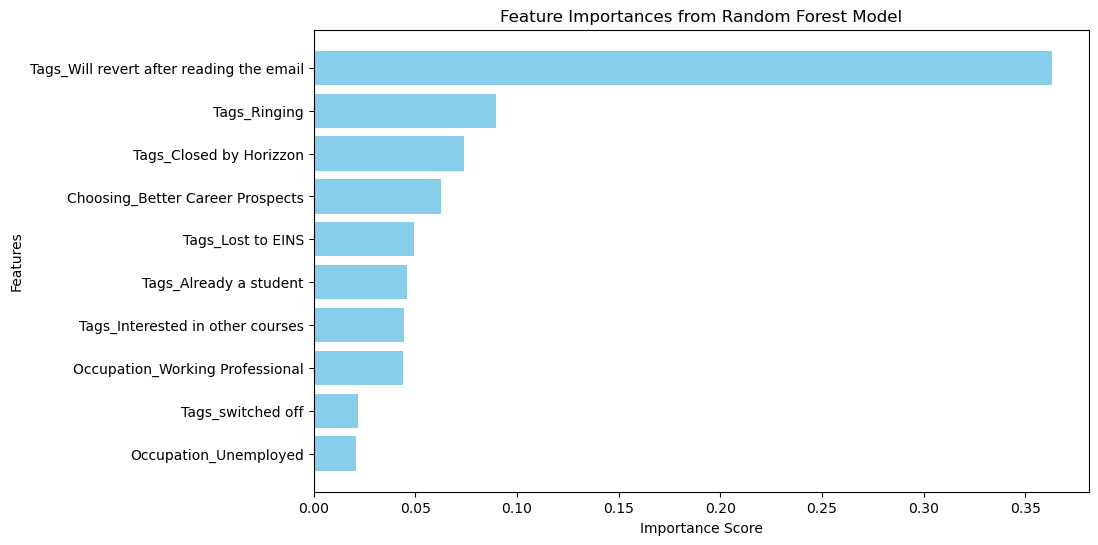

In [48]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

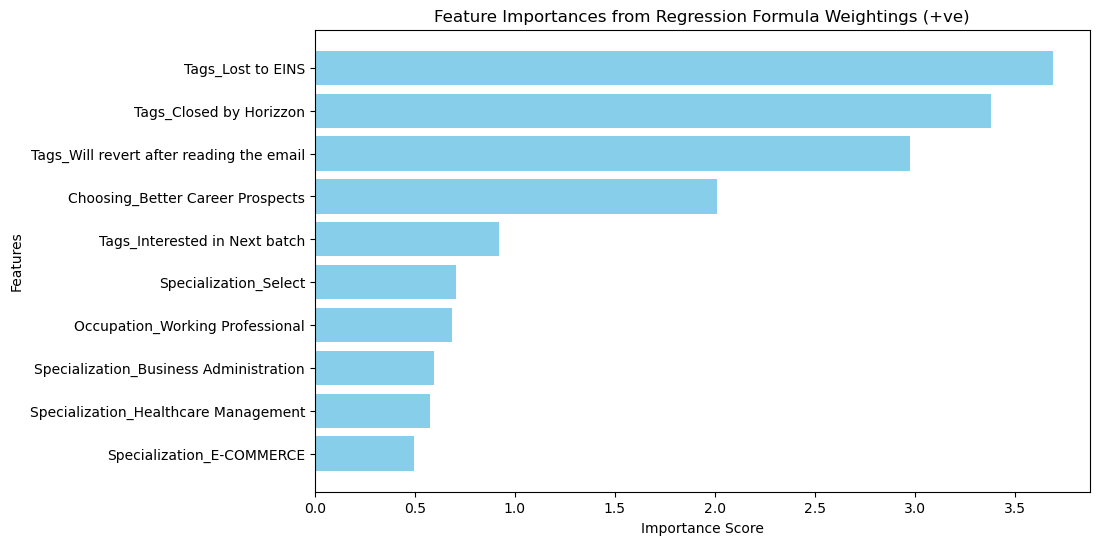

In [49]:
# To plot the important features using the weightings
# Creating a DataFrame with feature importance data
data = {
    'Feature': [
        'Tags_Lost to EINS', 'Tags_Closed by Horizzon',
        'Tags_Will revert after reading the email', 'Choosing_Better Career Prospects',
        'Tags_Interested in Next batch', 'Specialization_Select',
        'Occupation_Working Professional', 'Specialization_Business Administration',
        'Specialization_Healthcare Management', 'Specialization_E-COMMERCE'
    ],
    'Importance': [
        3.689, 3.381, 2.977, 2.011, 0.919,
        0.704, 0.687, 0.597, 0.575, 0.496
    ]
}

feature_importances2 = pd.DataFrame(data)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances2['Feature'], feature_importances2['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Regression Formula Weightings (+ve)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

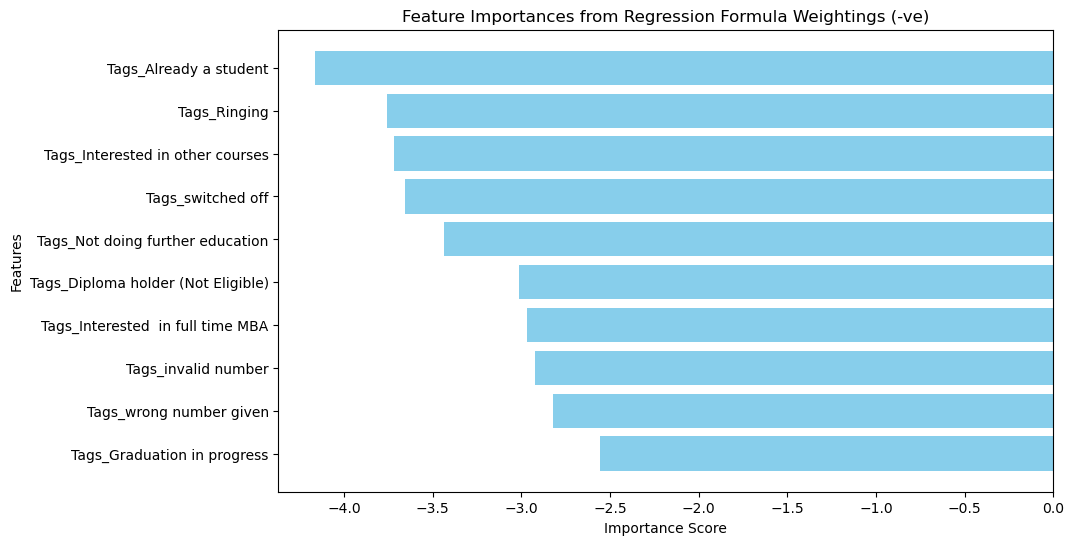

In [50]:
# To plot the important features using the weightings
# Creating a DataFrame with feature importance data
data = {
    'Feature': [
         'Tags_Already a student', 'Tags_Ringing',
        'Tags_Interested in other courses', 'Tags_switched off',
        'Tags_Not doing further education', 'Tags_Diploma holder (Not Eligible)',
        'Tags_Interested  in full time MBA', 'Tags_invalid number',
        'Tags_wrong number given', 'Tags_Graduation in progress'
    ],
    'Importance': [
        -4.162, -3.755, -3.716, -3.655, -3.439,
        -3.015, -2.967, -2.923, -2.819, -2.554
    ]
}

feature_importances3 = pd.DataFrame(data)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances3['Feature'], feature_importances3['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Regression Formula Weightings (-ve)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

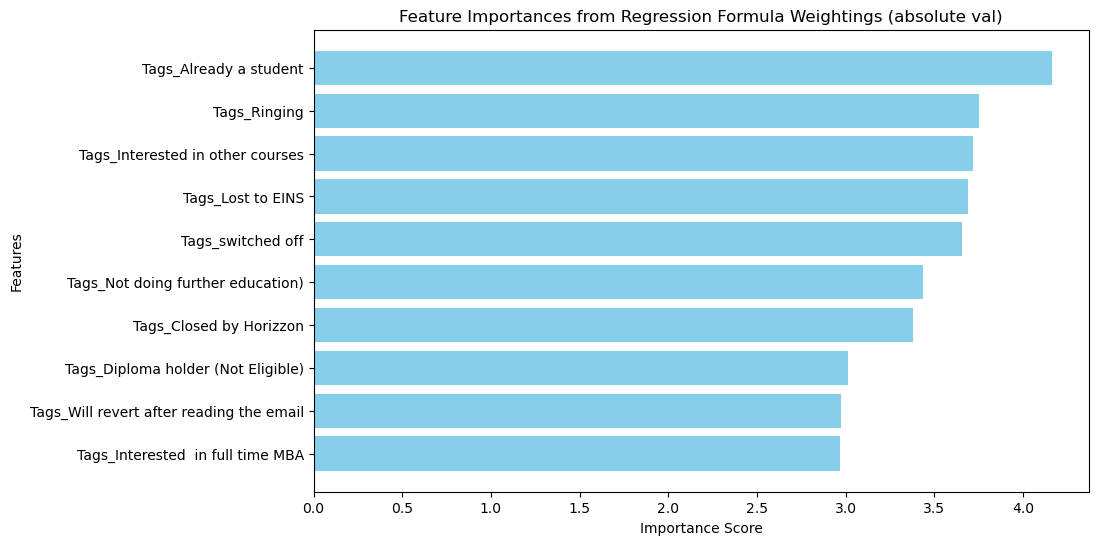

In [51]:
# To plot the important features using the weightings
# Creating a DataFrame with feature importance data
data = {
    'Feature': [
         'Tags_Already a student', 'Tags_Ringing',
        'Tags_Interested in other courses', 'Tags_Lost to EINS',
        'Tags_switched off', 'Tags_Not doing further education)',
        'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
        'Tags_Will revert after reading the email', 'Tags_Interested  in full time MBA'
    ],
    'Importance': [
        4.162, 3.755, 3.716, 3.689, 3.655,
        3.439, 3.381, 3.015, 2.977, 2.967
    ]
}

feature_importances4 = pd.DataFrame(data)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances4['Feature'], feature_importances4['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Regression Formula Weightings (absolute val)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [52]:
# Ensemble using Gadient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix of Gadient Boosting Model:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

Confusion Matrix of Gadient Boosting Model:
[[1610   85]
 [ 161  916]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1695
           1       0.92      0.85      0.88      1077

    accuracy                           0.91      2772
   macro avg       0.91      0.90      0.91      2772
weighted avg       0.91      0.91      0.91      2772


ROC-AUC Score:
0.9496837878626032


In [53]:
# Get feature importances
importances1 = gb_model.feature_importances_

# Get feature names
feature_names1 = X_train.columns

# Create a DataFrame to hold feature names and their importance
feature_importances1 = pd.DataFrame({'Feature': feature_names1, 'Importance': importances1})

# Sort the DataFrame by importance in descending order
feature_importances1 = feature_importances1.sort_values(by='Importance', ascending=False)

feature_importances1.head(10)

,Feature,Importance
38,Tags_Will revert after reading the email,0.604650
21,Tags_Closed by Horizzon,0.142507
29,Tags_Lost to EINS,0.078071
33,Tags_Ringing,0.030898
16,Choosing_Better Career Prospects,0.024875
19,Tags_Already a student,0.020002
27,Tags_Interested in other courses,0.017097
60,Specialization_Select,0.016835
43,Tags_switched off,0.009999
20,Tags_Busy,0.009154


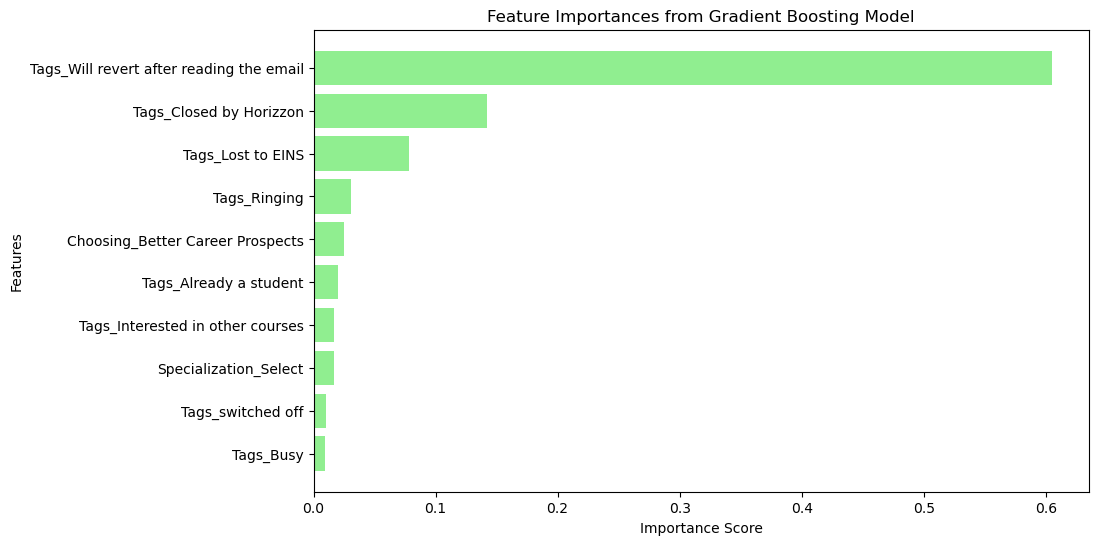

In [54]:
# To plot the important features
# Creating a DataFrame with feature importance data
data = {
    'Feature': [
        'Tags_Will revert after reading the email', 'Tags_Closed by Horizzon',
        'Tags_Lost to EINS', 'Tags_Ringing',
        'Choosing_Better Career Prospects', 'Tags_Already a student',
        'Tags_Interested in other courses', 'Specialization_Select',
        'Tags_switched off', 'Tags_Busy'
    ],
    'Importance': [
        0.604650, 0.142507, 0.078071, 0.030898, 0.024875,
        0.020002, 0.017097, 0.016835, 0.009999, 0.009154
    ]
}

feature_importances1 = pd.DataFrame(data)
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances1['Feature'], feature_importances1['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

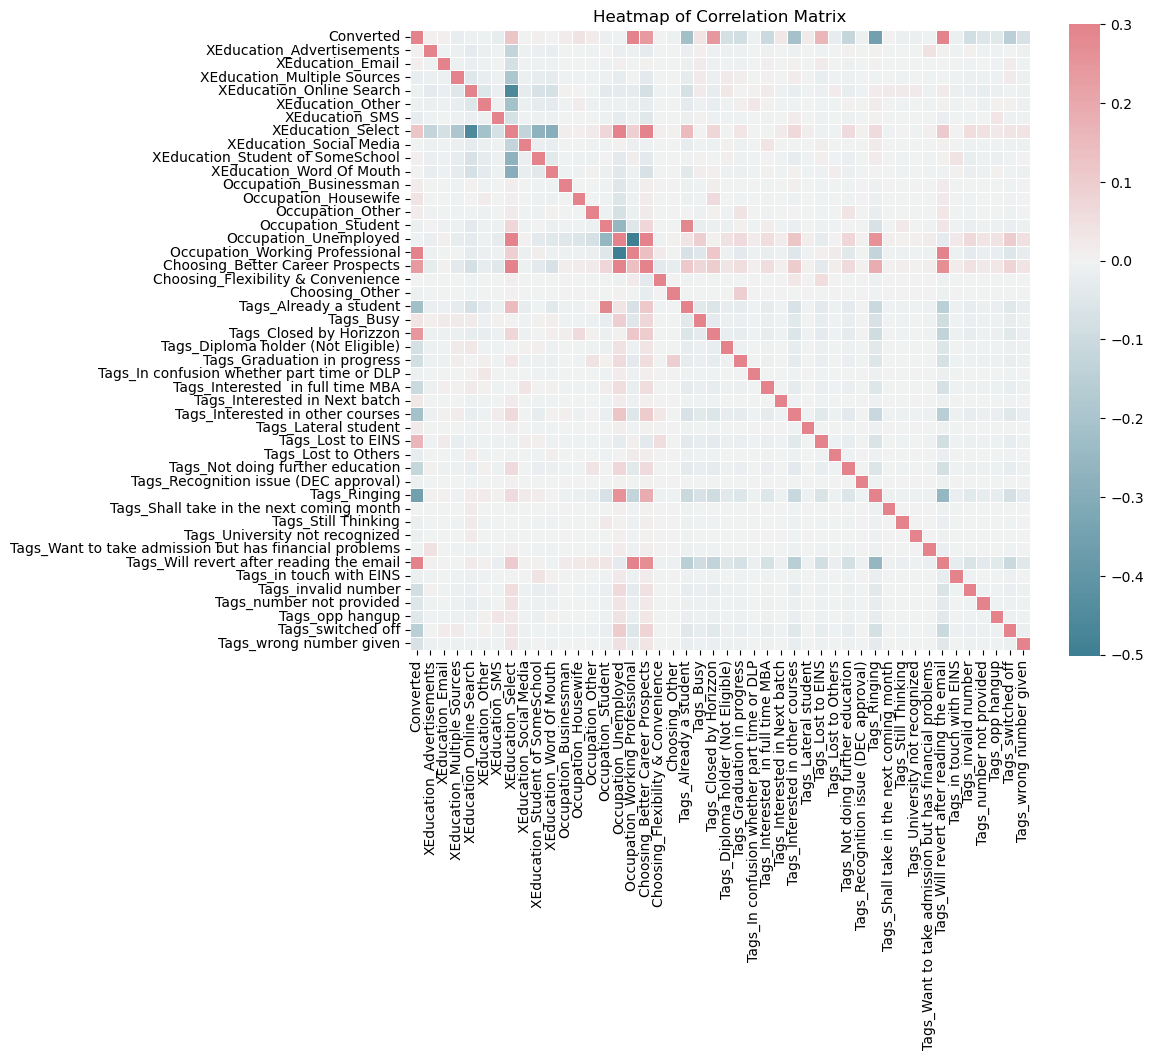

In [55]:
# Create our Corelation Matrix to view the positive / negative effect of the correlation
corr = Clients1_dummies.corr(numeric_only=True)
corr

# Generate our corelation plot or heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [56]:
# Trial test on the Occupation Vs Specialization corelation:
# To check whether the Occupation Vs Specialization to turn out more Converted rates (i.e. Converted = 1)
Occ_Spec = lead[['Converted','What is your current occupation','Specialization']]
Occ_Spec.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)
Occ_Spec.isnull().sum()

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\1983156601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Occ_Spec.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)


Converted            0
Occupation        2690
Specialization    1438
dtype: int64

In [57]:
# Drop the null rows: the removing is considered to be high
Occ_Spec=Occ_Spec.dropna()
Occ_Spec.isnull().sum()

Converted         0
Occupation        0
Specialization    0
dtype: int64

In [58]:
# Building a Occupation-Specialization matrix
Occ_Spec_matrix = Occ_Spec.pivot_table(index='Occupation', columns='Specialization', values='Converted',aggfunc='sum')

# Convert NaN to Num
Occ_Spec_matrix = Occ_Spec_matrix.applymap(lambda x: 1 if x > 0 else 0)
Occ_Spec_matrix.head()

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\3565185991.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Occ_Spec_matrix = Occ_Spec_matrix.applymap(lambda x: 1 if x > 0 else 0)


Specialization,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
Occupation,,,,,,,,,,,,,,,,,,,
Businessman,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
Housewife,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
Other,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0
Student,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
Unemployed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [59]:
Occ_Spec_matrix.shape

(6, 19)

In [60]:
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

# Use the sklearn cosine_similarity function to compute the pairwise cosine similarities between the Occupations 

user_matrix = pd.DataFrame(cosine_similarity(Occ_Spec_matrix))
user_matrix

,0,1,2,3,4,5
0,1.000000,0.223607,0.408248,0.485071,0.458831,0.458831
1,0.223607,1.000000,0.730297,0.542326,0.512989,0.512989
2,0.408248,0.730297,1.000000,0.594089,0.561951,0.561951
3,0.485071,0.542326,0.594089,1.000000,0.945905,0.945905
4,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000
5,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000


In [61]:
pd.DataFrame(Occ_Spec_matrix.index)
user_matrix.columns = Occ_Spec_matrix.index
pd.DataFrame(user_matrix.columns)
user_matrix

Occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
0,1.000000,0.223607,0.408248,0.485071,0.458831,0.458831
1,0.223607,1.000000,0.730297,0.542326,0.512989,0.512989
2,0.408248,0.730297,1.000000,0.594089,0.561951,0.561951
3,0.485071,0.542326,0.594089,1.000000,0.945905,0.945905
4,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000
5,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000


In [62]:
user_matrix['Occupation'] = Occ_Spec_matrix.index
user_matrix = user_matrix.set_index('Occupation')
user_matrix

Occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Occupation,,,,,,
Businessman,1.000000,0.223607,0.408248,0.485071,0.458831,0.458831
Housewife,0.223607,1.000000,0.730297,0.542326,0.512989,0.512989
Other,0.408248,0.730297,1.000000,0.594089,0.561951,0.561951
Student,0.485071,0.542326,0.594089,1.000000,0.945905,0.945905
Unemployed,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000
Working Professional,0.458831,0.512989,0.561951,0.945905,1.000000,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

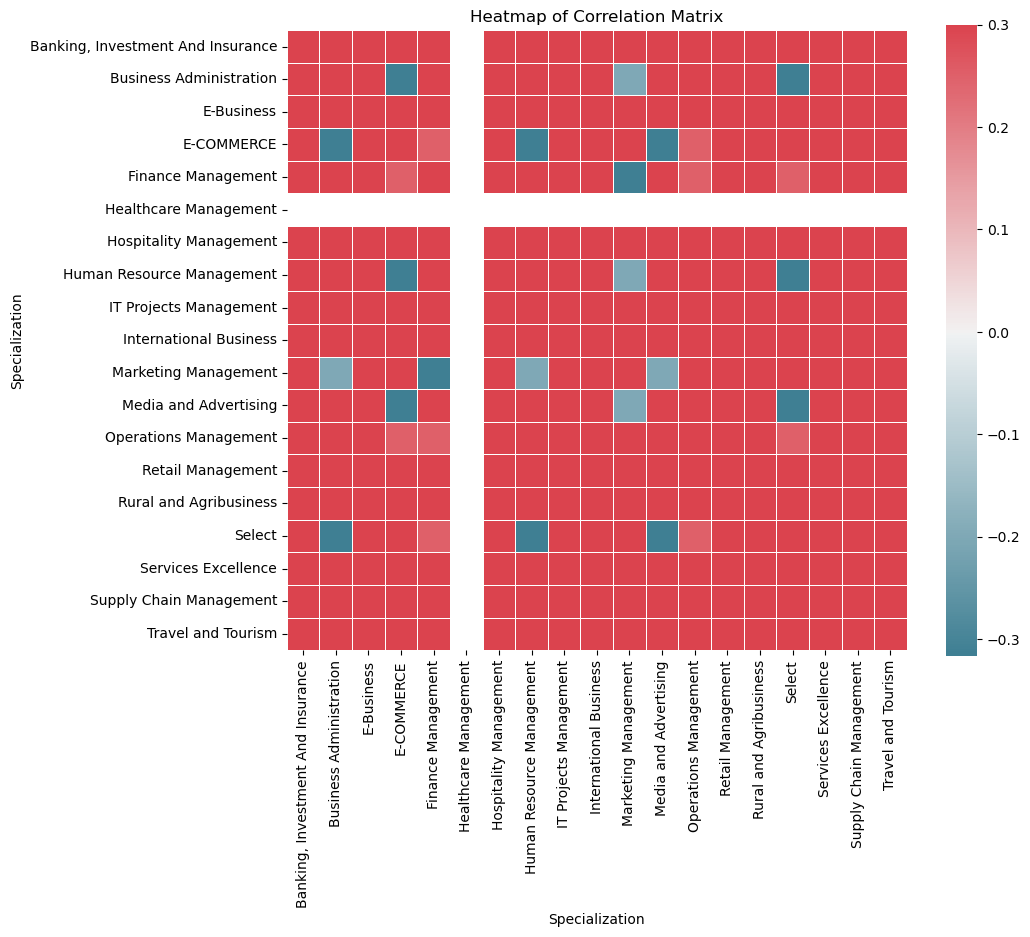

In [73]:
# Create our Corelation Matrix to view the positive / negative effect of the correlation
corr = Occ_Spec_matrix.corr(numeric_only=True)
corr

# Generate our corelation plot or heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [ ]:
# Hypothesis D, Model 2, Regression Analysis on Asymmetrique columns

In [63]:
# retrieve the Review-related columns from the lead Datasets
Review = lead[['Converted','Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index']]
Review.head()

,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index
0,0,15.0,15.0,02.Medium,02.Medium
1,0,15.0,15.0,02.Medium,02.Medium
2,1,14.0,20.0,02.Medium,01.High
3,0,13.0,17.0,02.Medium,01.High
4,1,15.0,18.0,02.Medium,01.High


In [64]:
# Convert the inputs of the 3 Asymmetrique columns into -1/0/1 columns
high_medium_low_columns = [
     'Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index'
]

# Replace '01.High' with 1, '02.Medium' with 0 and '03.Low' with -1 in the specified columns
Review[high_medium_low_columns] = Review[high_medium_low_columns].replace({'01.High': 1, '02.Medium': 0, '03.Low':-1})

#print(Marketing[high_medium_low_columns].head())
Review.head()

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\241071774.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Review[high_medium_low_columns] = Review[high_medium_low_columns].replace({'01.High': 1, '02.Medium': 0, '03.Low':-1})
C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\241071774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review[high_medium_low_columns] = Review[high_medium_low_columns].replace({'01.High': 1, '02.Medium': 0, '03.Low':-1})


,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index
0,0,15.0,15.0,0.0,0.0
1,0,15.0,15.0,0.0,0.0
2,1,14.0,20.0,0.0,1.0
3,0,13.0,17.0,0.0,1.0
4,1,15.0,18.0,0.0,1.0


In [65]:
# Import Necessary Libraries for Regression Analysis
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
# Regression model for f(Converted, 'Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index' )
independent1 = [ 'Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index']

X1 = Review[independent1]
y1 = Review['Converted']

In [66]:
Review.describe()

,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index
count,9240.000000,5022.000000,5022.000000,5022.000000,5022.000000
mean,0.385390,14.306252,16.344883,0.091398,0.432497
std,0.486714,1.386694,1.811395,0.476713,0.507780
min,0.000000,7.000000,11.000000,-1.000000,-1.000000
25%,0.000000,14.000000,15.000000,0.000000,0.000000
50%,0.000000,14.000000,16.000000,0.000000,0.000000
75%,1.000000,15.000000,18.000000,0.000000,1.000000
max,1.000000,18.000000,20.000000,1.000000,1.000000


In [67]:
Review.isnull().sum()

Converted                         0
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
Asymmetrique Activity Index    4218
Asymmetrique Profile Index     4218
dtype: int64

In [68]:
# Checking % total of the null value of each columns
round(100*Review.isnull().sum()/len(Review.index))

Converted                       0.0
Asymmetrique Activity Score    46.0
Asymmetrique Profile Score     46.0
Asymmetrique Activity Index    46.0
Asymmetrique Profile Index     46.0
dtype: float64

In [69]:
# Drop the null rows
Review=Review.dropna()

Review.isnull().sum()

Converted                      0
Asymmetrique Activity Score    0
Asymmetrique Profile Score     0
Asymmetrique Activity Index    0
Asymmetrique Profile Index     0
dtype: int64

In [70]:
# Split the data for training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [71]:
# check data types of all columns to see whether they are the same
print(X1_train.dtypes)
print(X1_test.dtypes)

Asymmetrique Activity Score    float64
Asymmetrique Profile Score     float64
Asymmetrique Activity Index    float64
Asymmetrique Profile Index     float64
dtype: object
Asymmetrique Activity Score    float64
Asymmetrique Profile Score     float64
Asymmetrique Activity Index    float64
Asymmetrique Profile Index     float64
dtype: object


In [72]:
from sklearn.model_selection import GridSearchCV
# Fill NaN values with the mean of each column
X1_train.fillna(X1_train.mean(), inplace=True)
X1_test.fillna(X1_test.mean(), inplace=True)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X1_train, y1_train)

# Print the best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print("Best Score:")
print(grid_search.best_score_)

# Predict and evaluate
y1_pred = grid_search.best_estimator_.predict(X1_test)
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("Classification Report:")
print(classification_report(y1_test, y1_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y1_test, grid_search.best_estimator_.predict_proba(X1_test)[:, 1]))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:
{'model__C': 0.1, 'model__solver': 'liblinear'}
Best Score:
0.6615651271679271
Confusion Matrix:
[[1611   84]
 [ 852  225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1695
           1       0.73      0.21      0.32      1077

    accuracy                           0.66      2772
   macro avg       0.69      0.58      0.55      2772
weighted avg       0.68      0.66      0.60      2772

ROC-AUC Score:
0.6167141875032525


In [73]:
# Alternative 1: To improve the low recall for class 1, but long processing time
# Add a class_weight='balanced' option to the LogisticRegression model to automatically adjust the weights inversely proportional to class frequencies.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

# Include additional hyperparameters like penalty, fit_intercept, and class_weight to explore more combinations that might improve model performance.
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__class_weight': [None, 'balanced'],
    'model__fit_intercept': [True, False]
}

# Perform cross-validated grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1', verbose=1)
grid_search.fit(X1_train, y1_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the

C:\Users\ratse\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.27647322        nan 0.26148954 0.30035609 0.29356609 0.29356609
        nan        nan        nan        nan 0.32934801 0.32934801
 0.47912022        nan 0.47912022 0.50618387 0.50618387 0.50618387
        nan        nan        nan        nan 0.49996862 0.49996862
 0.48490974        nan 0.38786983 0.41644581 0.41644581 0.41644581
        nan        nan        nan        nan 0.40987951 0.40987951
 0.48490974        nan 0.48490974 0.50613819 0.50613819 0.50613819
        nan        nan        nan        nan 0.49784349 0.49784349
 0.32934801        nan 0.32934801 0.32934801 0.32934801 0.32934801
        nan        nan        nan        nan 0.32934801 0.32934801
 0.49563441        nan 0.49563441 0.49545061 0.49545061 0.49545061
        nan        nan        nan        nan 0.49996862 0.49996862
 0.40961867        nan 0.40917125 0.40571226 0.405712

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=3000))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced'],
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1', verbose=1)

In [74]:
# Alternative 2: Agressive Threshold Adjustment
# Instead of using the default decision threshold of 0.5, experiment with different thresholds to find one that balances precision and recall for Class 1.

from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, roc_auc_score

# Get predicted probabilities for Class 1
y1_probs = grid_search.best_estimator_.predict_proba(X1_test)[:, 1]

# Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y1_test, y1_probs)

# Choose a more conservative threshold that avoids recall = 1
# Find the index where recall is maximized but below 1, to balance precision and recall
optimal_threshold = thresholds[np.argmax(recalls * (recalls < 1))]  # Avoid recall = 1

# Apply the chosen threshold to the predictions
y1_pred_threshold = (y1_probs >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("Adjusted Threshold Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred_threshold))
print("Adjusted Threshold Classification Report:")
print(classification_report(y1_test, y1_pred_threshold))
print("ROC-AUC Score:")
print(roc_auc_score(y1_test, y1_probs))

Adjusted Threshold Confusion Matrix:
[[  23 1672]
 [   1 1076]]
Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.01      0.03      1695
           1       0.39      1.00      0.56      1077

    accuracy                           0.40      2772
   macro avg       0.67      0.51      0.29      2772
weighted avg       0.74      0.40      0.23      2772

ROC-AUC Score:
0.622841225626741


In [75]:
# Logistic Regression with scikit-learn

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X1_train, y1_train)

# Extract coefficients and intercept
coefficients = model.coef_[0]  # For binary classification, coef_ is 2D; we need the 1st row
intercept = model.intercept_[0]

# Extract feature names
feature_names = X1.columns

# Build the formula string
formula_parts = [f"{coef:.3f} * {name}" for coef, name in zip(coefficients, feature_names)]
formula = " + ".join(formula_parts)
formula = f"logit(p) = {intercept:.3f} + {formula}"

# Print the logistic regression formula
print("Logistic Regression Formula:")
print(formula)

# Predict on the test set
y1_pred = model.predict(X1_test)

# Evaluate the model
#print(confusion_matrix(y1_test, y1_pred))
#print(classification_report(y1_test, y1_pred))

Logistic Regression Formula:
logit(p) = -20.204 + 0.904 * Asymmetrique Activity Score + 0.438 * Asymmetrique Profile Score + -1.920 * Asymmetrique Activity Index + -0.547 * Asymmetrique Profile Index


In [76]:
# Logistic Regression with Statsmodels

# Add a constant to the features matrix for the intercept term
X1_train_sm = sm.add_constant(X1_train)
X1_test_sm = sm.add_constant(X1_test)

# Fit the model
model_sm = sm.Logit(y1_train, X1_train_sm).fit()

# Print the summary
print(model_sm.summary())

# Make predictions
y1_pred_prob = model_sm.predict(X1_test_sm)
y1_pred_binary = (y1_pred_prob > 0.5).astype(int)

# Evaluate the model
print(confusion_matrix(y1_test, y1_pred_binary))
print(classification_report(y1_test, y1_pred_binary))

Optimization terminated successfully.
         Current function value: 0.627725
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6468
Model:                          Logit   Df Residuals:                     6463
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                 0.05748
Time:                        23:29:23   Log-Likelihood:                -4060.1
converged:                       True   LL-Null:                       -4307.7
Covariance Type:            nonrobust   LLR p-value:                7.138e-106
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -20.5220      1.092    -18.791      0.000   

In [ ]:
# Hypotheses C: study on the demographic columns

In [77]:
# retrieve the Demographic-related columns from the lead Datasets
Demographic = lead[['Converted','Country','City']]
Demographic.head()

,Converted,Country,City
0,0,NaN,Select
1,0,India,Select
2,1,India,Mumbai
3,0,India,Mumbai
4,1,India,Mumbai


In [78]:
# Checking the null entries
Demographic.isnull().sum()

Converted       0
Country      2461
City         1420
dtype: int64

In [79]:
# Checking % null value of each columns
round(100*Demographic.isnull().sum()/len(Demographic.index))

Converted     0.0
Country      27.0
City         15.0
dtype: float64

In [80]:
Demographic['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [81]:
Demographic['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

AttributeError: 'Axes' object has no attribute 'get_xticklables'

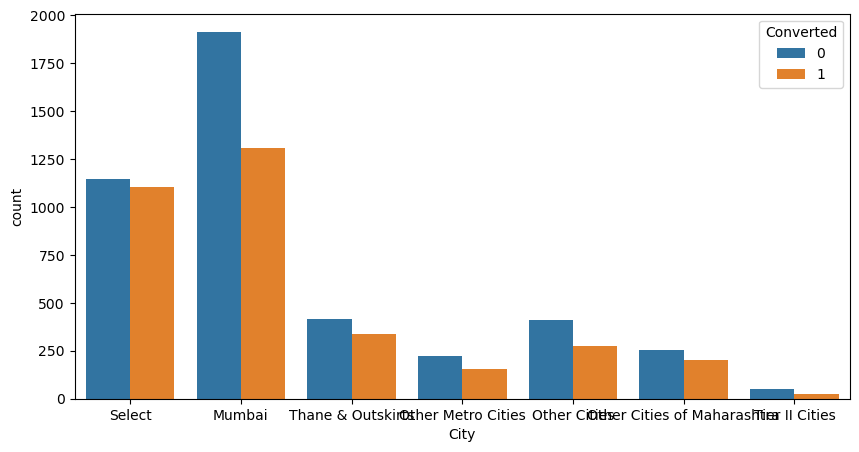

In [82]:
# assuming the missing data are the major city, Mumbai
#Demographic['City']=Demographic['City'].replace[NaN,'Mumbai']
# plotting spread of City column then
plt.figure(figsize=(10,5))
s1=sns.countplot(x='City',hue='Converted',data=Demographic)
s1.set_xticklabels(s1.get_xticklables(),rotation=90)
plt.show()

AttributeError: 'Axes' object has no attribute 'get_xticklables'

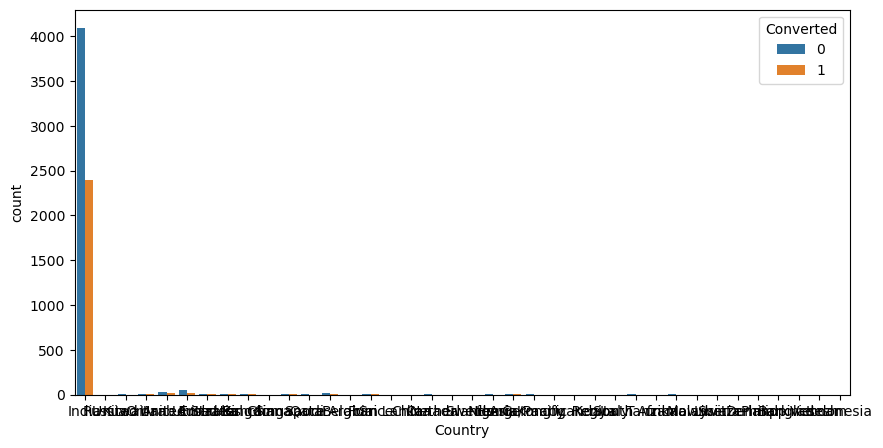

In [83]:
# plotting spread of Country column then
plt.figure(figsize=(10,5))
s1=sns.countplot(x='Country',hue='Converted',data=Demographic)
s1.set_xticklabels(s1.get_xticklables(),rotation=90)
plt.show()

In [ ]:
# Hypotheses D: Study on the Review-related columns

In [84]:
# retrieve the Review-related columns from the lead Datasets
# Not to include 'Last Activity','Last Notable Activity',
Review = lead[['Converted','Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Profile Index','What matters most to you in choosing a course','Tags']]
Review.head()

,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index,What matters most to you in choosing a course,Tags
0,0,15.0,15.0,02.Medium,02.Medium,Better Career Prospects,Interested in other courses
1,0,15.0,15.0,02.Medium,02.Medium,Better Career Prospects,Ringing
2,1,14.0,20.0,02.Medium,01.High,Better Career Prospects,Will revert after reading the email
3,0,13.0,17.0,02.Medium,01.High,Better Career Prospects,Ringing
4,1,15.0,18.0,02.Medium,01.High,Better Career Prospects,Will revert after reading the email


In [85]:
# retrieve the columns, What matters most to you in choosing a course' and 'Tags' from the lead Datasets and combine into
# Text col
review=Review[['Converted','What matters most to you in choosing a course','Tags']]
review['concatenated']=Review['What matters most to you in choosing a course']+' '+Review['Tags']
review=review.drop(columns=['What matters most to you in choosing a course','Tags'])
review.head()

C:\Users\ratse\AppData\Local\Temp\ipykernel_17132\3999119405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['concatenated']=Review['What matters most to you in choosing a course']+' '+Review['Tags']


,Converted,concatenated
0,0,Better Career Prospects Interested in other co...
1,0,Better Career Prospects Ringing
2,1,Better Career Prospects Will revert after read...
3,0,Better Career Prospects Ringing
4,1,Better Career Prospects Will revert after read...


In [86]:
!pip install gensim
#!pip install --upgrade gensim

In [87]:
import gensim
print(gensim.__version__)

4.3.3


In [88]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import string
from pathlib import Path
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ratse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
from nltk.tokenize import sent_tokenize

#Tokenize the first review into sentence
tokenized_sent = sent_tokenize(review.concatenated[1])
print(tokenized_sent)
print('number of sentences:' + str(len(tokenized_sent)))

['Better Career Prospects Ringing']
number of sentences:1


In [90]:
from nltk.tokenize import word_tokenize

tokenized_words = word_tokenize(review.concatenated[1])
print(tokenized_words)
print('number of words:' + str(len(tokenized_words)))

['Better', 'Career', 'Prospects', 'Ringing']
number of words:4


In [91]:
#Loop through all reviews and tokenize into words
all_words = [word.lower() for sent in map(str,review['concatenated']) for word in word_tokenize(sent)]

#print the first 10 words
print(all_words[:10])

['better', 'career', 'prospects', 'interested', 'in', 'other', 'courses', 'better', 'career', 'prospects']


In [92]:
# removing stopwords
stop_words=set(stopwords.words("english"))

filtered_sent=[]

for w in all_words:
    w = w.lower()
    if w not in stop_words:
        filtered_sent.append(w)
        
# Remove common words
common_words = ['nan', '(',')']
filtered_sent_R = [word for word in filtered_sent if word not in common_words]
        
print("Tokenized Sentence:",tokenized_words)
print("Filterd Sentence:",filtered_sent_R)

Tokenized Sentence: ['Better', 'Career', 'Prospects', 'Ringing']
Filterd Sentence: ['better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'lost', 'eins', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'confusion', 'whether', 'part', 'time', 'dlp', 'better', 'career', 'prospects', 'revert', 'r

In [93]:
# stemming
#Import PorterStemmer
from gensim.parsing.porter import PorterStemmer

porter_stemmer = PorterStemmer()
stemmed_words=[]
for w in filtered_sent_R:
    stemmed_words.append(porter_stemmer.stem(w))

print("Filtered Sentence:",filtered_sent_R)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'lost', 'eins', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'ringing', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'interested', 'courses', 'better', 'career', 'prospects', 'confusion', 'whether', 'part', 'time', 'dlp', 'better', 'career', 'prospects', 'revert', 'reading', 'email', 'better', 'career', 'prospects', 'ringing', 'b

In [94]:
#Import frequency distribution
from nltk.probability import FreqDist

# calculate the number of occurence of each word in the entire list of words
all_words_frequency = FreqDist(filtered_sent_R)
print (all_words_frequency)

# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (all_words_frequency.most_common(10))

# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (all_words_frequency.most_common()[-10:])

<FreqDist with 61 samples and 29715 outcomes>

Top 10 most frequently occurring words
[('better', 5803), ('career', 5803), ('prospects', 5803), ('revert', 2072), ('reading', 2072), ('email', 2072), ('ringing', 1203), ('interested', 603), ('courses', 481), ('student', 468)]

Top 10 least frequently occurring words
[('month', 2), ('flexibility', 2), ('&', 2), ('convenience', 2), ('university', 2), ('recognized', 2), ('recognition', 1), ('issue', 1), ('dec', 1), ('approval', 1)]


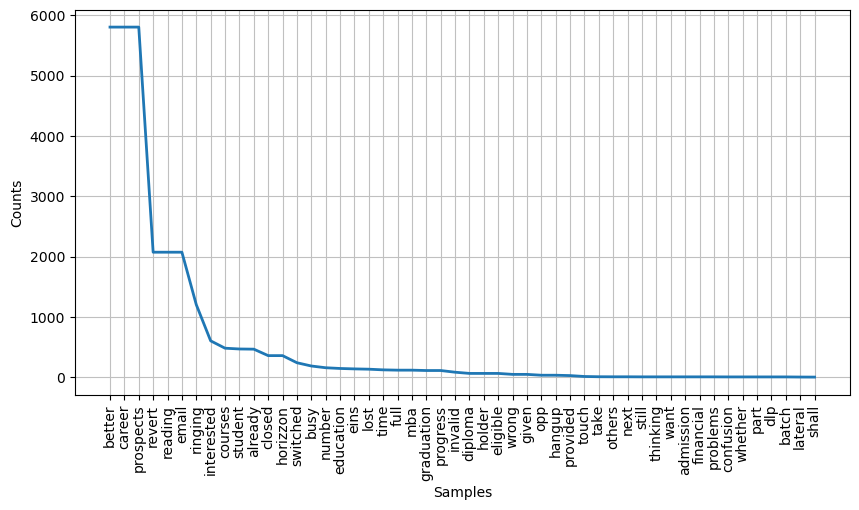

In [95]:
#Import Matplotlib Libary
import matplotlib.pyplot as plt

# create a function to plot the frequency, make it a function as we will be re-using it later.
def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50, cumulative=False)
    plt.show()

plot_frequency(all_words_frequency)

In [96]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


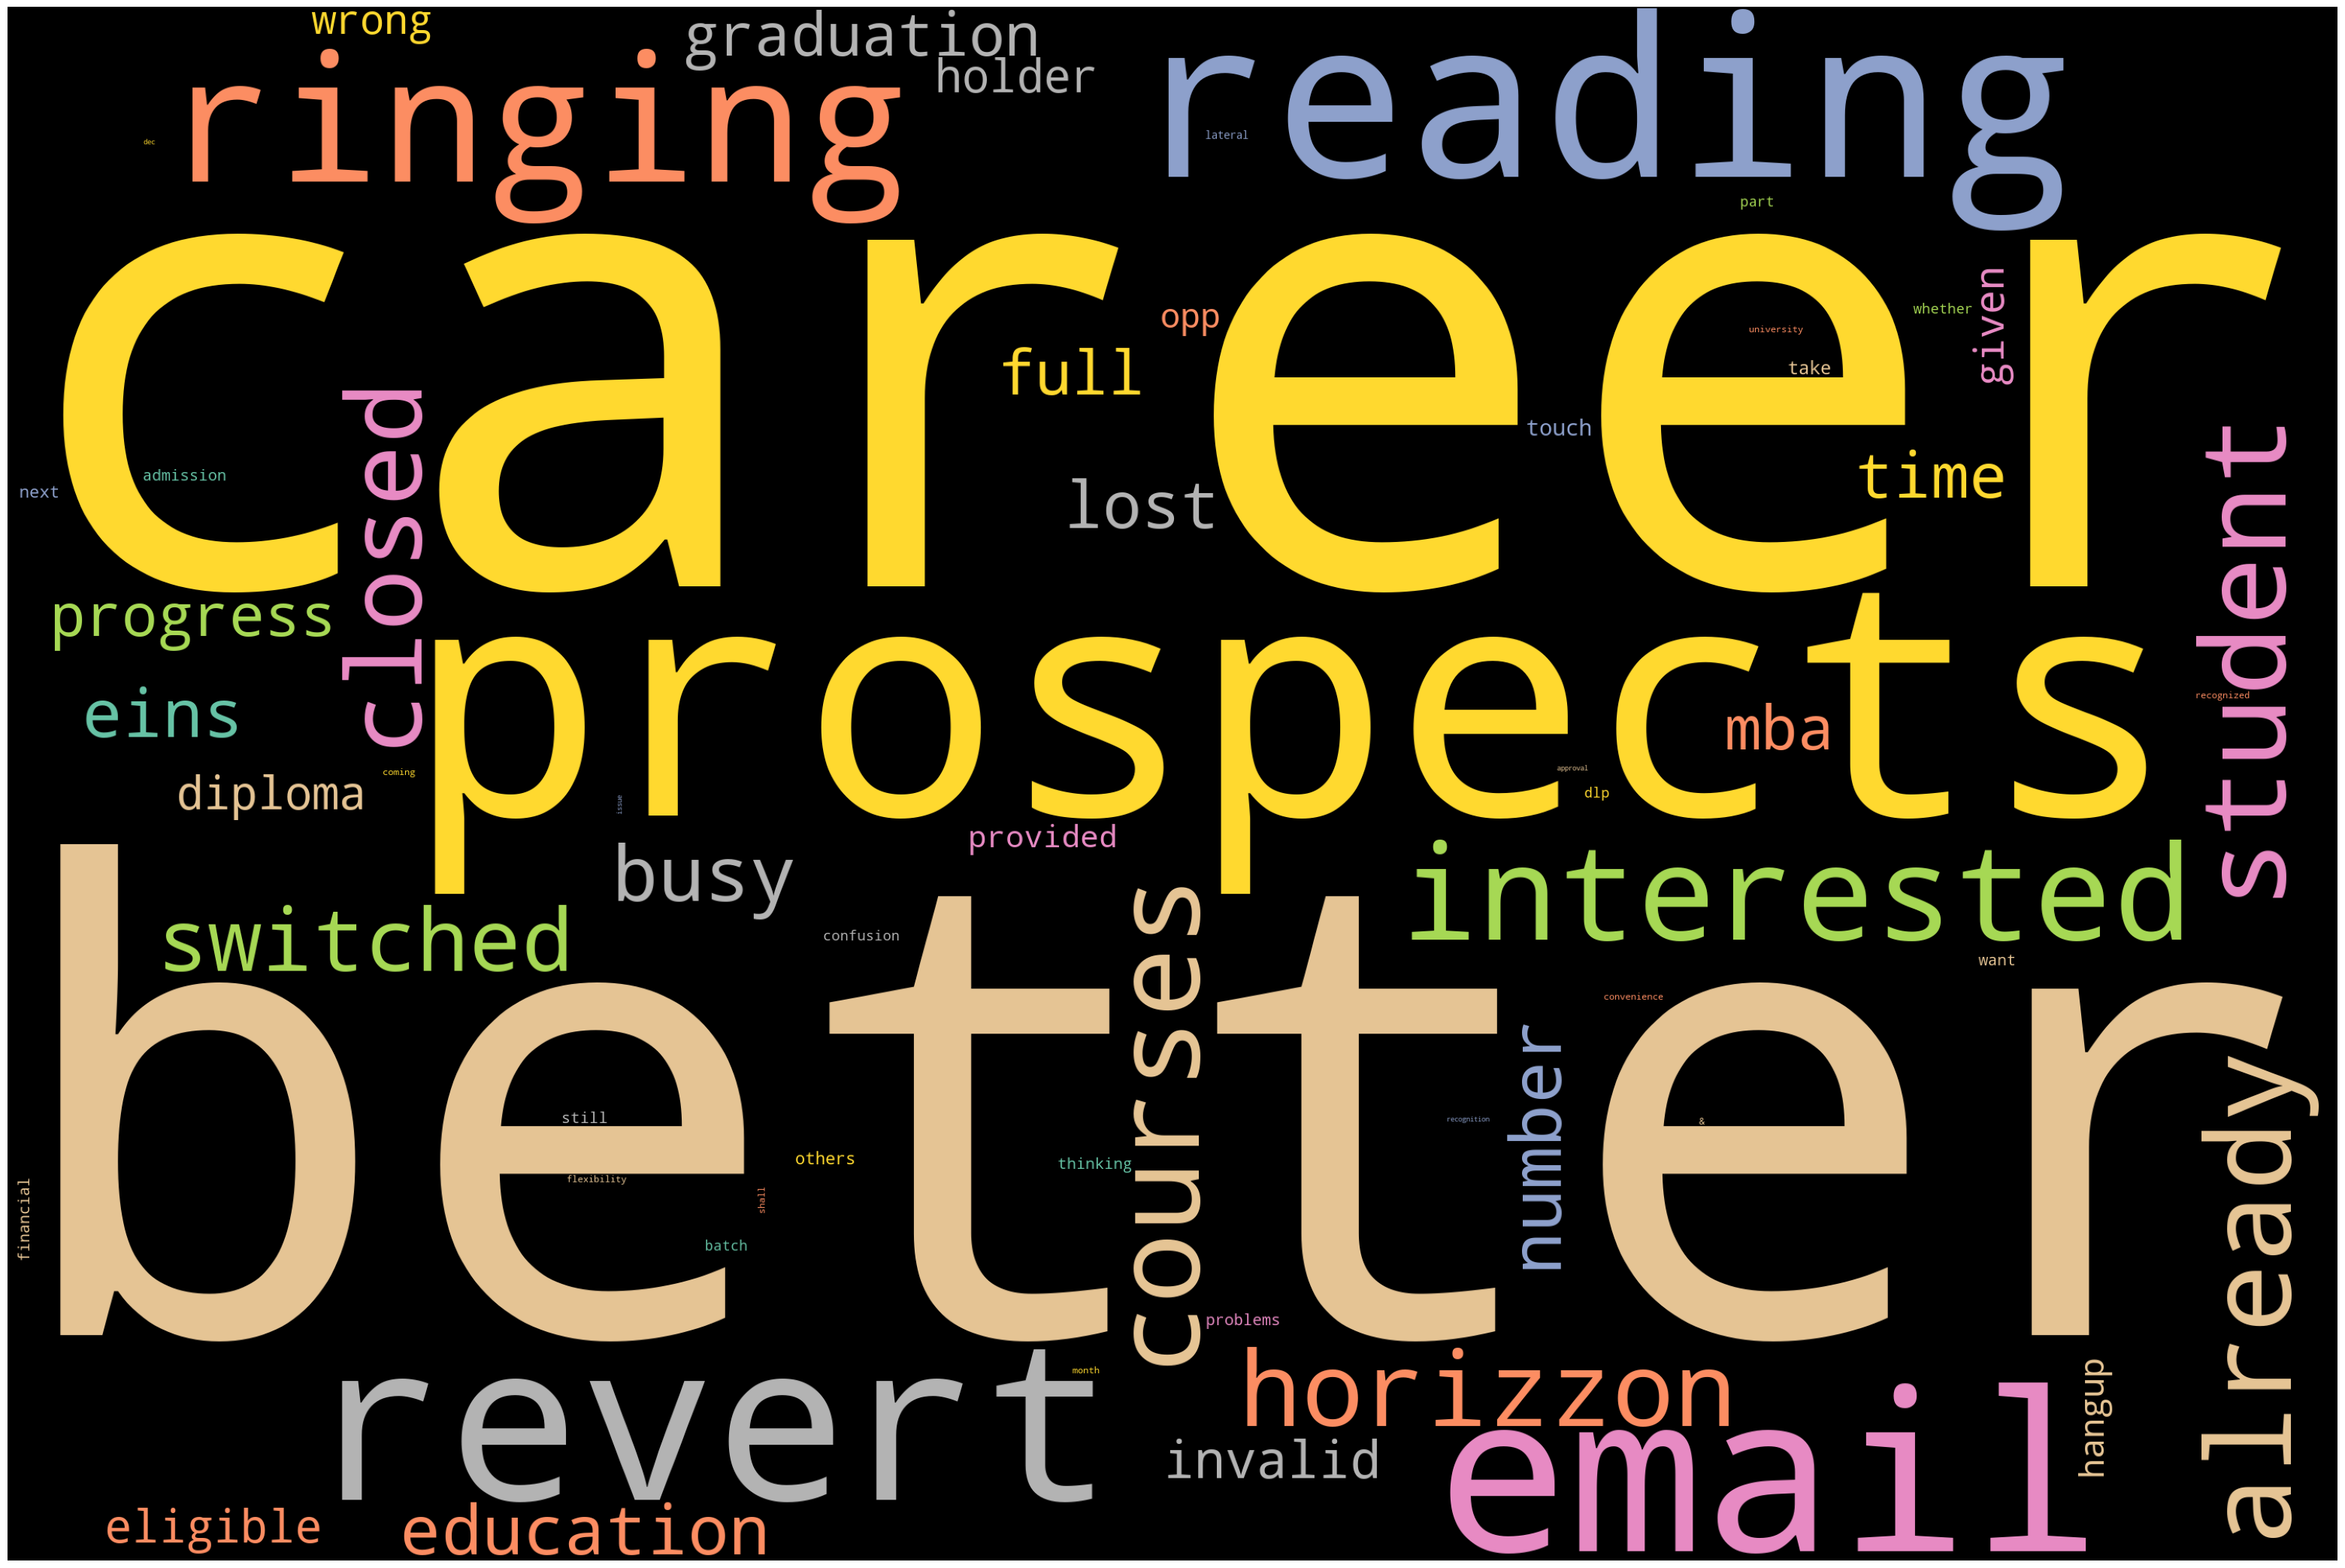

In [97]:
from wordcloud import WordCloud

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
                      collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

# Plot
plot_cloud(wordcloud)

In [60]:
# Generate Vector Space Model using Term Frequency


In [98]:
#Import Libraries
from nltk.tokenize import word_tokenize

from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
import string
from nltk.corpus import stopwords

# Initialize the stemmer
porter_stemmer = PorterStemmer()

stopwords_english = set(stopwords.words('english'))
common_words =['nan', '(',')']
stopwords_english.update(common_words)

def clean(doc):
    all_words_clean = []
    for word in doc:
        # remove stopwords and number
        if word not in stopwords_english:
            # remove punctuation
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if len(punc_free)>=2 and not punc_free.isdigit():
                # stem word to root word
                all_words_clean.append(porter_stemmer.stem(punc_free))
    return all_words_clean

# Ensure all values in 'concatenated' are strings and handle NaN or non-string values
review['concatenated'] = review['concatenated'].fillna('')  # Replace NaNs with an empty string
review['concatenated'] = review['concatenated'].astype(str)  # Convert everything to string

# Apply the text processing steps
review['concatenated'] = review['concatenated'].apply(lambda x: word_tokenize(x.lower()))
review['concatenated'] = review['concatenated'].apply(lambda x: clean(x))

review['ProcessedReview'] = review['concatenated'].apply(lambda x: " ".join(x))

review.head()

,Converted,concatenated,ProcessedReview
0,0,"[better, career, prospect, interest, cours]",better career prospect interest cours
1,0,"[better, career, prospect, ring]",better career prospect ring
2,1,"[better, career, prospect, revert, read, email]",better career prospect revert read email
3,0,"[better, career, prospect, ring]",better career prospect ring
4,1,"[better, career, prospect, revert, read, email]",better career prospect revert read email


In [99]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(review['ProcessedReview'])

bow_features = pd.DataFrame(dtm.toarray(),index=review.index,columns=vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
bow_features.head()

52


,admiss,alreadi,approv,batch,better,busi,career,close,come,confus,...,ring,shall,student,switch,think,time,touch,univers,want,wrong
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Generate Vector Space Model using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(review['ProcessedReview'])

tfidf_features = pd.DataFrame(dtm.toarray(),index=review.index,columns=vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
tfidf_features.head()

52


,admiss,alreadi,approv,batch,better,busi,career,close,come,confus,...,ring,shall,student,switch,think,time,touch,univers,want,wrong
0,0.0,0.0,0.0,0.0,0.311869,0.0,0.311869,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.370124,0.0,0.370124,0.0,0.0,0.0,...,0.76748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.292381,0.0,0.292381,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.370124,0.0,0.370124,0.0,0.0,0.0,...,0.76748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.292381,0.0,0.292381,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Singular Value Decomposition (SVD)

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [102]:
# Each component is a linear combination of words
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names_out())

,admiss,alreadi,approv,batch,better,busi,career,close,come,confus,...,ring,shall,student,switch,think,time,touch,univers,want,wrong
component_1,0.000128,0.041002,0.000019,0.000394,0.414043,0.022738,0.414043,0.029072,0.000052,0.000176,...,0.231506,0.000052,0.041031,0.030715,0.000480,0.007437,0.000736,0.000076,0.000128,0.001973
component_2,0.000158,0.067794,0.000023,0.000484,0.208547,0.030592,0.208547,0.044310,0.000063,0.000223,...,0.638420,0.000063,0.067822,0.042473,0.000591,0.009729,0.000942,0.000094,0.000158,0.002549


In [103]:
# Each document is a linear combination of the components
pd.DataFrame(dtm_lsa, index = review.index, columns = ["component_1","component_2"])

,component_1,component_2
0,0.839523,0.543324
1,0.662069,0.749443
2,0.923127,-0.384495
3,0.662069,0.749443
4,0.923127,-0.384495
...,...,...
9235,0.923127,-0.384495
9236,0.883408,0.468605
9237,0.882435,0.470434
9238,-0.000000,0.000000


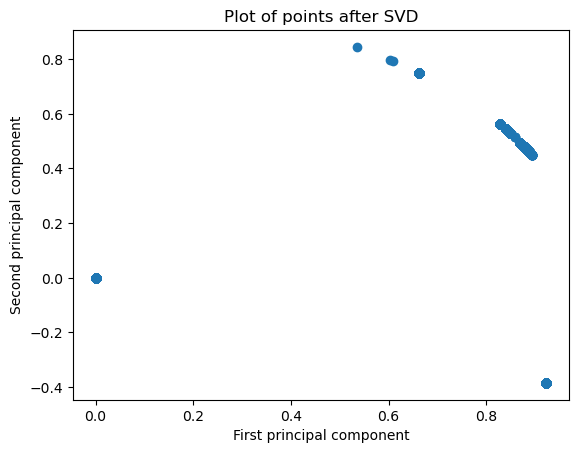

In [104]:
# Visualise SVD in Scatter Plot
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points after SVD')
plt.show()

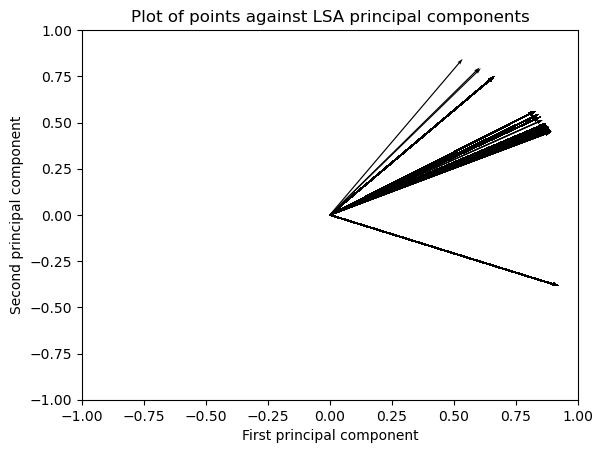

In [105]:
# Plot quiver plot of points
plt.figure()
ax = plt.gca()
start = [0] * len(xs)
ax.quiver(start,start,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [106]:
# Pre-Trained Word Vector
import gensim
from gensim.models import KeyedVectors

#loading the downloaded model
google_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=500000) #limit=500000
#model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, map='r')

In [107]:
review

,Converted,concatenated,ProcessedReview
0,0,"[better, career, prospect, interest, cours]",better career prospect interest cours
1,0,"[better, career, prospect, ring]",better career prospect ring
2,1,"[better, career, prospect, revert, read, email]",better career prospect revert read email
3,0,"[better, career, prospect, ring]",better career prospect ring
4,1,"[better, career, prospect, revert, read, email]",better career prospect revert read email
...,...,...,...
9235,1,"[better, career, prospect, revert, read, email]",better career prospect revert read email
9236,0,"[better, career, prospect, wrong, number, given]",better career prospect wrong number given
9237,0,"[better, career, prospect, invalid, number]",better career prospect invalid number
9238,1,[],


In [108]:
# Train my own Word2Vec
my_model = gensim.models.Word2Vec(review['concatenated'], min_count = 1, vector_size = 100, window = 5) 

In [109]:
# Predictions
w1 = "prospect"
if w1 in google_model.key_to_index:  # Use google_model.key_to_index or my_model.wv.key_to_index
    print(google_model.most_similar(positive=w1)) #print(model.wv.most_similar(positive=w1))
else:
    print(f"Word '{w1}' not found in the model's vocabulary.")

[('prospects', 0.6716291904449463), ('possibility', 0.5798658132553101), ('specter', 0.5193740129470825), ('Prospects', 0.4755338728427887), ('possiblity', 0.4576919972896576), ('possibilty', 0.44546547532081604), ('tantalizing_prospect', 0.43650636076927185), ('potential', 0.43552711606025696), ('likelihood', 0.43117159605026245), ('blue_chipper', 0.41951924562454224)]
